# **CS357000 Introduction to Multimedia - HW1**

In this homework, you'll be engaging with fundamental concepts of image processing, including 
+   image interpolation
+   enhancement
+   compression  

Each question is designed to build your understanding and skills in these areas.   
Follow the instructions carefully and complete the tasks in the provided code blocks.  
Additionally, you will be required to write a report in the designated sections to explain your methodology and findings.  

# **Submission**
+   Ensure that you have completed all tasks and filled in all reports before submitting.
+   Submit your Jupyter Notebook (**HW1_xxxxxxxxx_ooo.ipynb file where xxxxxxxxx is yout ID and ooo is your name**) through **eeclass** before the deadline. 


In [27]:
# Lib
# %pip install opencv-python numpy matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **Question 1 - Image Interpolation (30%)**
Write the image interpolation function to upsample the given image to 8 times the original width and height.   
Implement the following two different interpolation methods and show the 8X (both x and y directions) upsampled image.   
(You should not use any built-in function for the interpolation.)

In [8]:
def Interpolation_bilnear(img):
    '''
    In :
        img : image before interpolation
    Out : 
        img_out : image after interpolation
    '''
    # TODO apply bilinar interpolation to img

    height, width, channels = img.shape
    new_height, new_width = height * 8, width * 8
    img_out = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    for channel in range(channels):
        for y in range(new_height):
            for x in range(new_width):
                gx, gy = x / 8, y / 8
                gx0, gy0 = int(gx), int(gy)
                gx1, gy1 = min(gx0 + 1, width - 1), min(gy0 + 1, height - 1)
                a = gx - gx0
                b = gy - gy0
                img_out[y, x, channel] = (1 - a) * (1 - b) * img[gy0, gx0, channel] + a * (1 - b) * img[gy0, gx1, channel] + (1 - a) * b * img[gy1, gx0, channel] + a * b * img[gy1, gx1, channel]

    return img_out

def Interpolation_NearestNeighbor(img):
    '''
    In :
        img : image before interpolation
    Out : 
        img_out : image after interpolation
    '''
    # TODO apply Nearest Neighbor interpolation to img

    height, width, channels = img.shape
    new_height, new_width = height * 8, width * 8
    img_out = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    for channel in range(channels):
        for y in range(new_height):
            for x in range(new_width):
                gx, gy = x // 8, y // 8
                img_out[y, x, channel] = img[gy, gx, channel]
    
    return img_out

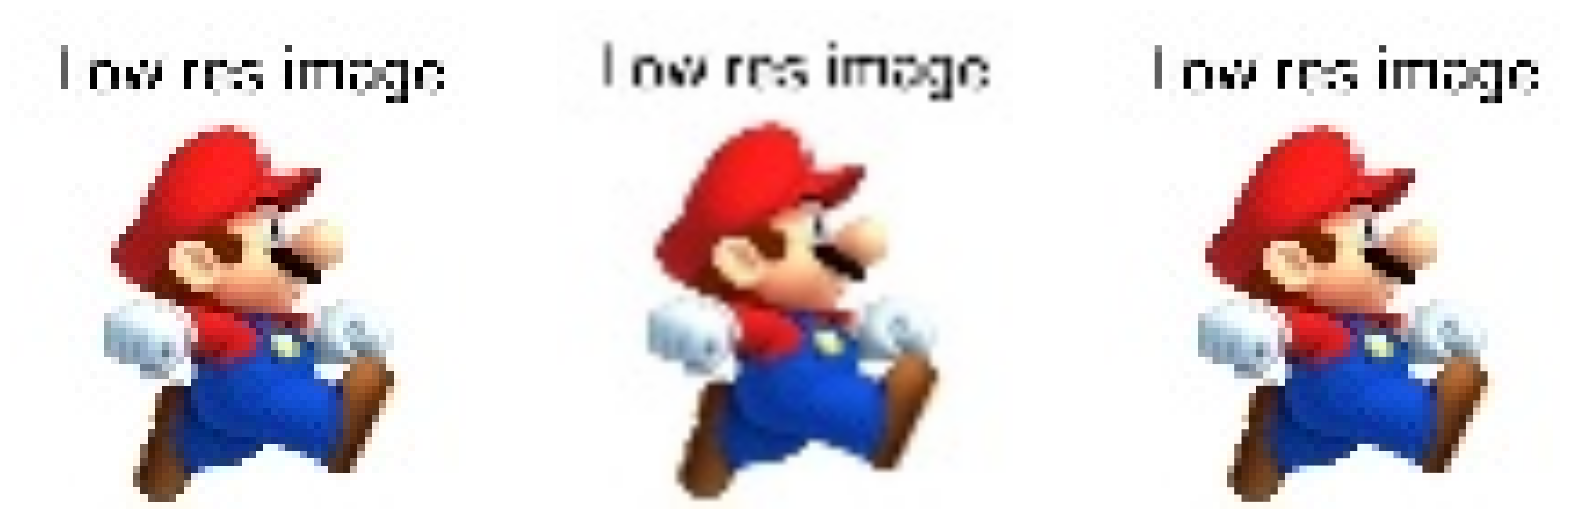

In [9]:
# main code
fig, ax=plt.subplots(1,3,figsize=(20, 20))
# read image
img=cv2.imread('./src/mario.jpg')
# apply bilinear interpolation
bi_img=Interpolation_bilnear(img.copy())
# apply nearest neighbor interpolation
nn_img=Interpolation_NearestNeighbor(img.copy())
# show 
ax[0].axis('off')
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].imshow(cv2.cvtColor(bi_img, cv2.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].imshow(cv2.cvtColor(nn_img, cv2.COLOR_BGR2RGB))

# Compare result and write down you observation
The image on the left is the original low-resolution image, which shows larger pixels and less detail.

The middle image has been upscaled using bilinear interpolation, a method that calculates new pixel values by taking a weighted average of neighboring pixels, resulting in a smoother image with more natural color transitions.

The image on the right has been upscaled using nearest neighbor interpolation, which duplicates the value of the nearest pixel from the original image, hence the enlarged image appears blockier with more pronounced pixelation.

## **Question 2 - Image enhencement (30%)**
implement the following steps to correct the image **dark room**. (You cannot use any built-in functions to perform the enhancement procedure)

In [14]:
def RGB2YIQ(img):
    '''
    In :
        img : image before conversion
    Out : 
        img_out : image after conversion
    '''
    # TODO apply RGB to YIQ conversion to img

    # Define the transformation matrix from RGB to YIQ
    transformation_matrix = np.array([[0.299, 0.587, 0.114],
                                      [0.596, -0.274, -0.322],
                                      [0.211, -0.523, 0.312]])
    # Reshape the image to a 2D array of size (height*width, 3)
    flat_img = img.reshape((-1, 3))
    # Apply the matrix transformation
    yiq = flat_img @ transformation_matrix.T  # Using @ for matrix multiplication
    # Reshape back to the original image shape
    img_out = yiq.reshape(img.shape)

    return img_out

def YIQ2RGB(img):
    '''
    In :
        img : image before conversion
    Out : 
        img_out : image after conversion
    '''
    # TODO apply RGB to YIQ conversion to img

    # Define the transformation matrix from YIQ to RGB
    transformation_matrix = np.array([[1.0, 0.956, 0.621],
                                      [1.0, -0.272, -0.647],
                                      [1.0, -1.106, 1.703]])
    # Reshape the image to a 2D array of size (height*width, 3)
    flat_img = img.reshape((-1, 3))
    # Apply the matrix transformation
    rgb = flat_img @ transformation_matrix.T
    # Ensure the values are within the proper range [0, 255]
    rgb = np.clip(rgb, 0, 255)
    # Reshape back to the original image shape and convert to uint8
    img_out = rgb.reshape(img.shape).astype('uint8')

    return img_out

def gamma_enhancement(img,gamma):
    '''
    In :
        img : image before enhancement
        gamma : hyperparameter for enhancement
    Out : 
        img_out : image after enhancement
    '''
    # TODO apply gamma enhancement to img

    img_normalized = img / 255.0
    img_gamma_corrected = np.power(img_normalized, 1/gamma)
    img_out = img_gamma_corrected * 255
    img_out = np.clip(img_out, 0, 255).astype('uint8')
    return img_out

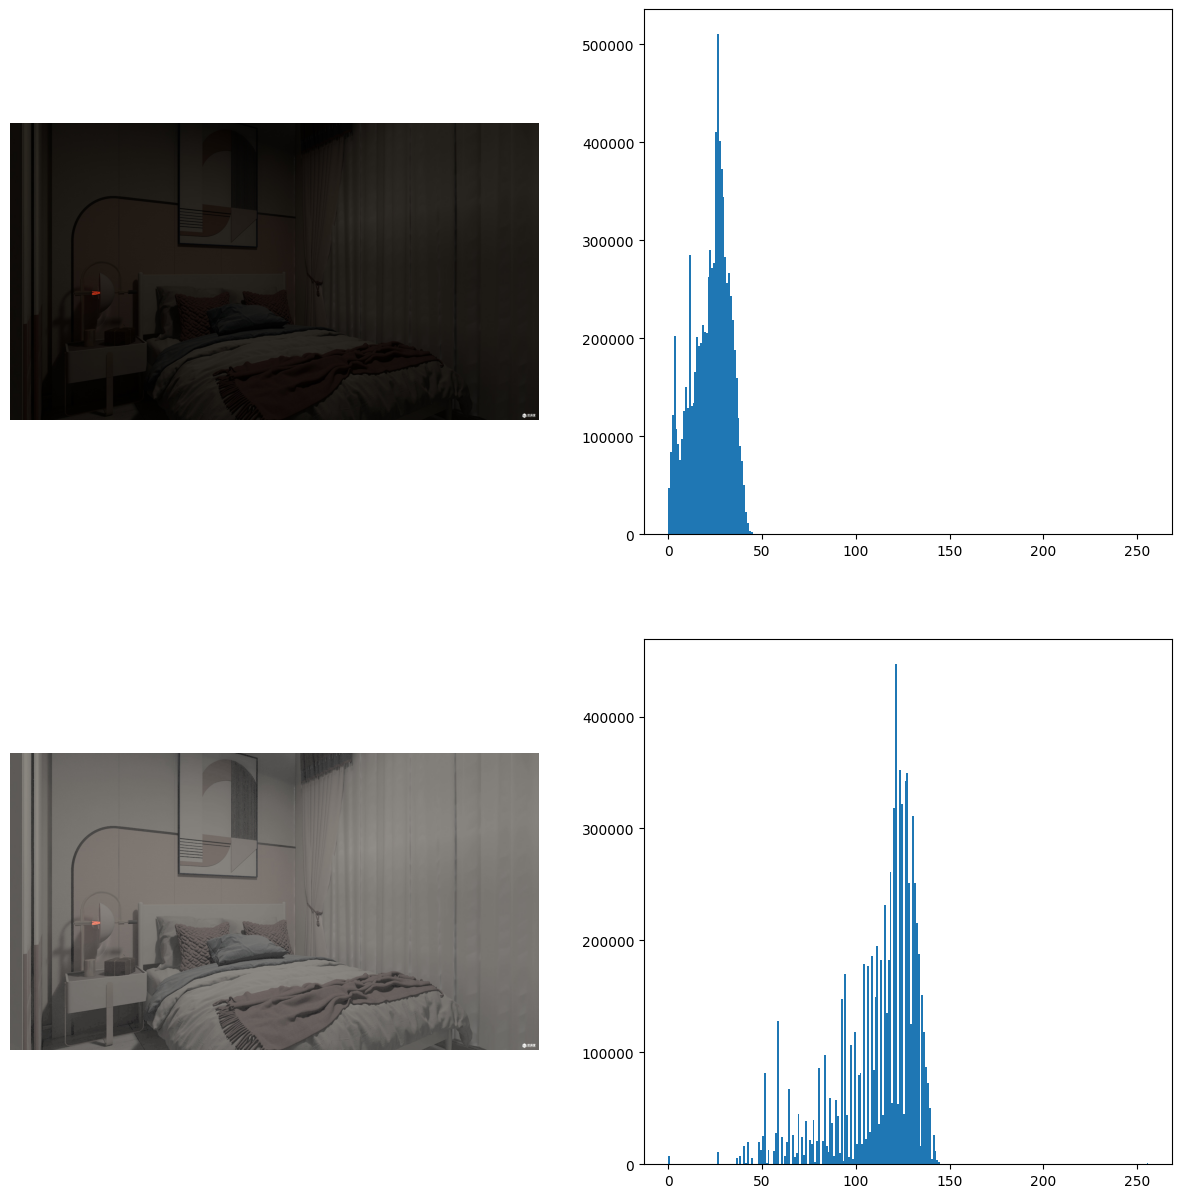

In [20]:
# main code
fig, ax=plt.subplots(2,2,figsize=(15,15))
# read image
img=cv2.imread('./src/darkroom.jpg')
# convert BGR to RGB
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# show image
ax[0][0].axis('off')
ax[0][0].imshow(img)
# apply RGB to YIQ conversion
img_yiq=RGB2YIQ(img.copy())
#show y channel's histogram before enhancement
_=ax[0][1].hist(img_yiq[:,:,0].ravel(),256,[0,256])

# apply gamma enhancement 
# TODO adjuest the suitable gamma value
gamma = 3
img_yiq[:,:,0] = gamma_enhancement(img_yiq[:,:,0], gamma)
enhanced_img = YIQ2RGB(img_yiq)
# show the emhanced image
ax[1][0].axis('off')
ax[1][0].imshow(enhanced_img)
#show y channel's histogram after enhancement
_= ax[1][1].hist(enhanced_img[:,:,0].ravel(),256,[0,256])


# Compare result and write down you observation
The first image is notably dark, with its histogram skewed heavily towards the lower (darker) end, indicating limited visibility and low contrast. The second image is visibly brighter and more detailed, with a histogram that spreads more evenly across the range, reflecting enhanced contrast.

## **Question 3 - Image Compression (30%)**
Transform the image tokyo.jpg from spatial domain to frequency domain with DCT   
for compression and reconstruct the compressed image using inverse DCT with reduced numbers 
and bits of DCT coefficients.  


## Remark
**For DCT transformation you can use cv2.dct and cv2.idct**

In [39]:
import math

Luminance_Qtable = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 36, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

Chrominance_Qtable = np.array([
    [17, 18, 24, 47, 99, 99, 99, 99],
    [18, 21, 26, 66, 99, 99, 99, 99],
    [24, 26, 56, 99, 99, 99, 99, 99],
    [47, 66, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99]
])

def PSNR(img1, img2):
    '''
    In :
        img1 : source image
        img2 : target image
    Out : 
        psnr : PSNR value
    '''
    # TODO calculate PSNR value
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # 避免除以0
        return float('inf')
    MAX_pixel = 255.0
    psnr = 20 * math.log10(MAX_pixel / math.sqrt(mse))
    return psnr

def RGB2YCbCr(img):
    '''
    In :
        img : image before conversion
    Out : 
        img_out : image after conversion
    '''
    # TODO apply RGB to YCbCr conversion to img
    img = img.astype(np.float32)
    Y = 0.257 * img[:,:,0] + 0.504 * img[:,:,1] + 0.098 * img[:,:,2] + 16
    Cb = -0.148 * img[:,:,0] - 0.291 * img[:,:,1] + 0.439 * img[:,:,2] + 128
    Cr = 0.439 * img[:,:,0] - 0.368 * img[:,:,1] - 0.071 * img[:,:,2] + 128
    return np.stack([Y, Cb, Cr], axis=-1)

def YCbCr2RGB(img):
    '''
    In :
        img : image before conversion
    Out : 
        img_out : image after conversion
    '''
    # TODO apply YCbCr to RGB conversion to img
    img = img.astype(np.float32)
    R = 1.164 * (img[:,:,0] - 16) + 1.596 * (img[:,:,2] - 128)
    G = 1.164 * (img[:,:,0] - 16) - 0.392 * (img[:,:,1] - 128) - 0.813 * (img[:,:,2] - 128)
    B = 1.164 * (img[:,:,0] - 16) + 2.017 * (img[:,:,1] - 128)
    return np.clip(np.stack([R, G, B], axis=-1), 0, 255).astype(np.uint8)

def merge_channels(Y, Cb, Cr):
    # Ensure Cb and Cr are upsampled correctly before calling this function
    return np.stack([Y, Cb, Cr], axis=-1)

def upsample2(img):
    '''
    In :
        img : image before upsampling
    Out : 
        img_out : image after upsampling
    '''
    # TODO apply upsampling to img
    # 進行2倍上採樣
    return cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
def Chromanance_subsample(img):
    '''
    In :
        img : Ycbcr image before subsampling
    Out : 
        Y : Y channel
        Cb: Cb channel
        Cr: Cr channel
    '''
    # TODO apply chromanance subsampling to img
    Y = img[:, :, 0]
    Cb = img[::2, ::2, 1]
    Cr = img[::2, ::2, 2]
    return Y, Cb, Cr

def Patch_DCT_with_Quantization(img,Qtable):
    '''
    In :
        img : image before DCT and quantization
        Qtable : quantization table
    Out : 
        img_out : image after DCT and quantization
    '''
    # TODO apply DCT and quantization to img
    h, w = img.shape
    img_out = np.zeros_like(img, dtype=np.float32)

    # Centering data around 0
    img_centered = img.astype(np.float32) - 128

    for i in range(0, h, 8):
        for j in range(0, w, 8):
            block = img_centered[i:i+8, j:j+8]
            pad_h = 8 - block.shape[0] if block.shape[0] < 8 else 0
            pad_w = 8 - block.shape[1] if block.shape[1] < 8 else 0
            block_padded = np.pad(block, ((0, pad_h), (0, pad_w)), 'edge')
            block_dct = cv2.dct(block_padded)
            block_quantized = np.round(block_dct / Qtable)

            # Writing back only the original block size
            img_out[i:i+block.shape[0], j:j+block.shape[1]] = block_quantized[:block.shape[0], :block.shape[1]]

    return img_out

def Patch_iDCT_with_Dequantization(img, Qtable):
    h, w = img.shape
    img_out = np.zeros_like(img, dtype=np.float32)

    for i in range(0, h, 8):
        for j in range(0, w, 8):
            block = img[i:i+8, j:j+8]
            # Determine the actual size of the block (could be smaller than 8x8 at edges)
            actual_h, actual_w = block.shape
            # Apply the quantization table only to the actual block size
            block_dequantized = block * Qtable[:actual_h, :actual_w]
            # Pad the dequantized block to 8x8 for inverse DCT, if necessary
            pad_h = 8 - actual_h
            pad_w = 8 - actual_w
            block_padded = np.pad(block_dequantized, ((0, pad_h), (0, pad_w)), 'edge')
            # Perform inverse DCT on the padded block
            block_idct = cv2.idct(block_padded)
            # Remove padding and adjust back the block into the output image
            img_out[i:i+actual_h, j:j+actual_w] = block_idct[:actual_h, :actual_w]

    # Normalize and clip the pixel values to 0-255 range, then convert to uint8
    return np.clip((img_out + 128), 0, 255).astype(np.uint8)


The PSNR after subsampling is  41.04080090075478
The compression rate after subsampling is  2.0
The rate of nonzeros in the compressed image is  0.09978567543985466
the PSNR after DCT compression is  33.07091582309481


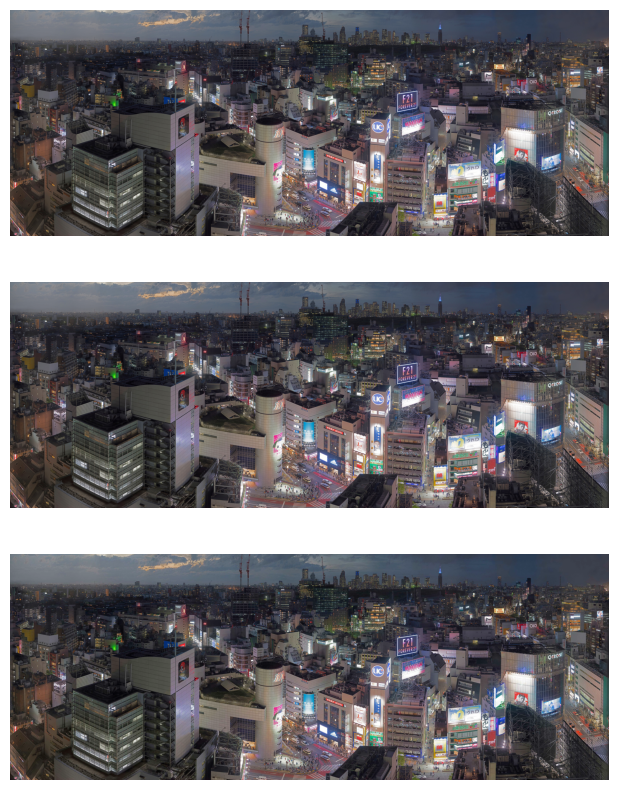

In [40]:
# main code
fig, ax=plt.subplots(3,1,figsize=(10,10))

# read image
img=cv2.imread('./src/tokyo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
original_byte=img.shape[0]*img.shape[1]*img.shape[2]
# show original image
ax[0].axis('off')
ax[0].imshow(img)
# convert RGB to Ycbcr
ycbcr_img=RGB2YCbCr(img.copy())
# Chrominance subsampling with 4:2:0
Y,Cb,Cr=Chromanance_subsample(ycbcr_img)
# upsample Cb and Cr channels
up_Cb=upsample2(Cb)
up_Cr=upsample2(Cr)
#TODO merge Y, up_Cb, up_Cr channels and transform back to RGB
merged_ycbcr = np.zeros_like(ycbcr_img)
merged_ycbcr[:, :, 0] = Y
merged_ycbcr[:, :, 1] = up_Cb
merged_ycbcr[:, :, 2] = up_Cr
compressed_img = YCbCr2RGB(merged_ycbcr)
# show the compressed image
ax[1].axis('off')
ax[1].imshow(compressed_img)
# calculate the PSNR after reconstruction
psnr=PSNR(img,compressed_img)
print("The PSNR after subsampling is ",psnr)
#TODO calculate compression rate after subsampling
compressed_byte = Y.size + Cb.size + Cr.size  # Only considering the size of Y, Cb, Cr channels, without headers
compression_rate = original_byte / compressed_byte
print("The compression rate after subsampling is ", compression_rate)
# apply DCT and quantization to Y channel
compressed_Y=Patch_DCT_with_Quantization(Y,Luminance_Qtable)
# apply DCT and quantization to Cb channel
compressed_Cb=Patch_DCT_with_Quantization(Cb,Chrominance_Qtable)
# apply DCT and quantization to Cr channel
compressed_Cr=Patch_DCT_with_Quantization(Cr,Chrominance_Qtable)

# TODO calculate the rate of nonezeros in the compressed image
nonzeros = np.count_nonzero(compressed_Y) + np.count_nonzero(compressed_Cb) + np.count_nonzero(compressed_Cr)
total_elements = compressed_Y.size + compressed_Cb.size + compressed_Cr.size
rate = nonzeros / total_elements
print("The rate of nonzeros in the compressed image is ", rate)

#apply inverse DCT and dequantization to Y channel
recover_Y=Patch_iDCT_with_Dequantization(compressed_Y,Luminance_Qtable)
#apply inverse DCT and dequantization to Cb channel
recover_Cb=Patch_iDCT_with_Dequantization(compressed_Cb,Chrominance_Qtable)
#apply inverse DCT and dequantization to Cr channel
recover_Cr=Patch_iDCT_with_Dequantization(compressed_Cr,Chrominance_Qtable)

# Todo upsample and merge Y, Cb, Cr channels and transform back to RGB
up_recover_Cb = upsample2(recover_Cb)
up_recover_Cr = upsample2(recover_Cr)
merged_recover_ycbcr = np.zeros_like(ycbcr_img)
merged_recover_ycbcr[:, :, 0] = recover_Y
merged_recover_ycbcr[:, :, 1] = up_recover_Cb
merged_recover_ycbcr[:, :, 2] = up_recover_Cr
recover_img = YCbCr2RGB(merged_recover_ycbcr)

ax[2].axis('off')
ax[2].imshow(recover_img)
# calculate the PSNR value
psnr=PSNR(img,recover_img)
print("the PSNR after DCT compression is ",psnr)

# Compare result and write down you observation

PSNR = 41.04080090075478 (after chroma subsampling) means that the image, after chroma subsampling, remains very close in quality to the original image.

Compression Rate = 2.0 (after chroma subsampling) means that after chroma subsampling, the size of the image data is half of the original data.

Rate of Nonzeros = 0.09978567543985466 (after DCT compression) means that about 90% of the coefficients are quantized to zero, which helps compress the image and reduce storage space requirements.

PSNR = 33.07091582309481 (after DCT compression and reconstruction) means that the image after DCT compression and reconstruction, still maintains a high degree of fidelity to the original image.